In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Caminho do arquivo
file_path = "movie_final.xlsx"

# Carregar o arquivo Excel
xls = pd.ExcelFile(file_path)

# Carregar a grelha principal
df = pd.read_excel(xls, sheet_name='movie_final')

df

,rank,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110.0,"28,341,469"
1,2,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367.0,"134,966,411"
2,3,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232.0,"534,858,444"
3,4,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952.0,"57,300,000"
4,5,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845.0,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544.0,NaN
996,997,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075.0,NaN
997,998,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374.0,"30,500,000"
998,999,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471.0,NaN


In [12]:
# Remover espaços extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Converter 'Runtime' de 'XX min' para número inteiro
df['Runtime'] = df['Runtime'].str.replace(' min', '', regex=True).astype(float)

# Converter 'Gross' para numérico, removendo vírgulas
df['Gross'] = df['Gross'].str.replace(',', '', regex=True).astype(float)

# Remover valores nulos para colunas essenciais
df.dropna(subset=['Released_Year', 'IMDB_Rating', 'Genre', 'Director'], inplace=True)

# Preencher valores nulos em colunas numéricas com a mediana
df.fillna({
    'Meta_score': df['Meta_score'].median(), 
    'Gross': df['Gross'].median(), 
    'No_of_Votes': df['No_of_Votes'].median()
}, inplace=True)

# Remover duplicados
df.drop_duplicates(inplace=True)

# Resetar o índice após remoção de linhas
df.reset_index(drop=True, inplace=True)

# Mostrar informações do dataset após o tratamento
print("\nInformações do dataset após limpeza:")
print(df.info())
print(df.head())


Informações do dataset após limpeza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           994 non-null    int64  
 1   Series_Title   994 non-null    object 
 2   Released_Year  994 non-null    object 
 3   Certificate    893 non-null    object 
 4   Runtime        994 non-null    float64
 5   Genre          994 non-null    object 
 6   IMDB_Rating    994 non-null    float64
 7   Overview       994 non-null    object 
 8   Meta_score     994 non-null    float64
 9   Director       994 non-null    object 
 10  Star1          994 non-null    object 
 11  Star2          994 non-null    object 
 12  Star3          994 non-null    object 
 13  Star4          994 non-null    object 
 14  No_of_Votes    994 non-null    float64
 15  Gross          994 non-null    float64
dtypes: float64(5), int64(1), object(10)
memory usage: 124.4+ KB


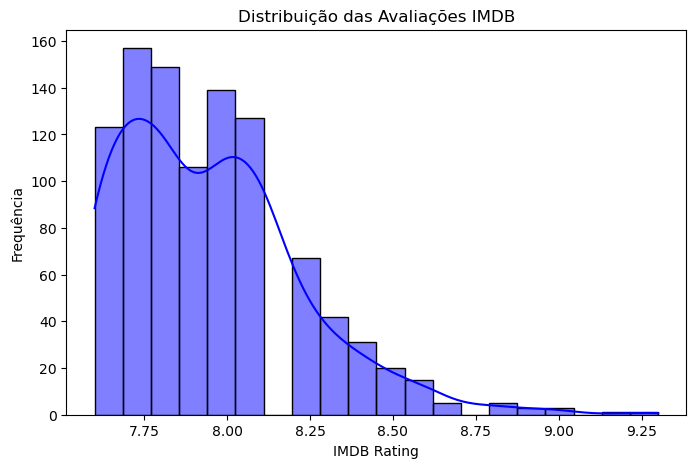


Top 10 Filmes com Maior Receita:
                                   Series_Title        Gross
473  Star Wars: Episode VII - The Force Awakens  936662225.0
59                            Avengers: Endgame  858373000.0
619                                      Avatar  760507625.0
60                       Avengers: Infinity War  678815482.0
648                                     Titanic  659325379.0
355                                The Avengers  623279547.0
885                               Incredibles 2  608581744.0
2                               The Dark Knight  534858444.0
578                                   Rogue One  532177324.0
63                        The Dark Knight Rises  448139099.0


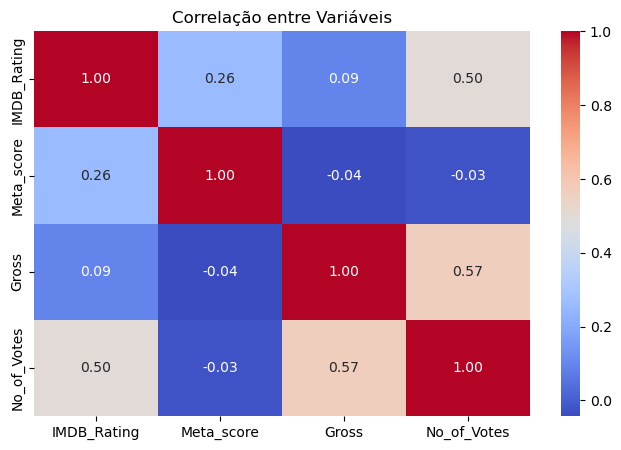

C:\Users\babis\AppData\Local\Temp\ipykernel_21004\370693271.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette="viridis")


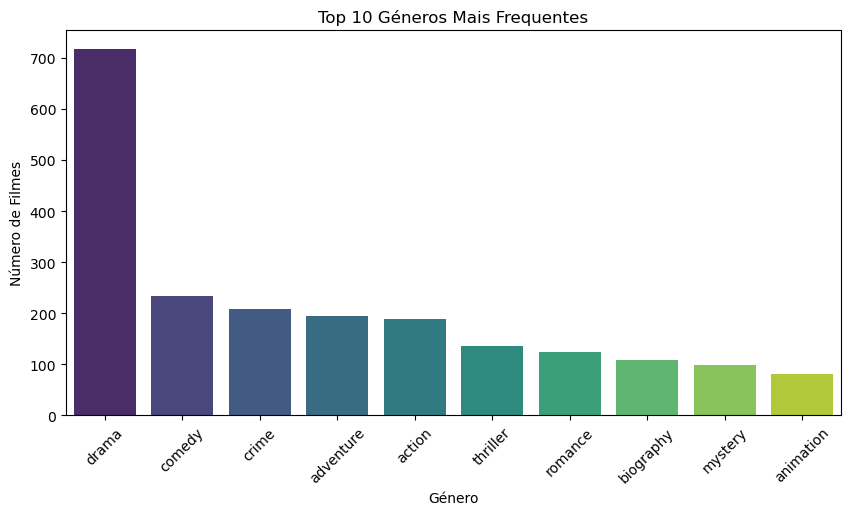

In [20]:
# ------------------- Exploração Inicial -------------------

# 1. Distribuição do IMDB Rating
plt.figure(figsize=(8, 5))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True, color="blue")
plt.title("Distribuição das Avaliações IMDB")
plt.xlabel("IMDB Rating")
plt.ylabel("Frequência")
plt.show()

# 2. Top 10 filmes mais rentáveis
top_gross_movies = df[['Series_Title', 'Gross']].sort_values(by='Gross', ascending=False).head(10)
print("\nTop 10 Filmes com Maior Receita:")
print(top_gross_movies)

# 3. Correlação entre IMDB Rating, Meta Score, Gross e Votos
correlation_matrix = df[['IMDB_Rating', 'Meta_score', 'Gross', 'No_of_Votes']].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre Variáveis")
plt.show()

# 4. Géneros mais frequentes
genre_counts = df['Genre'].str.split(',').explode().str.strip().str.lower().value_counts()

# Get the top 10 genres
top_genres = genre_counts.head(10)

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=top_genres.index, y=top_genres.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Géneros Mais Frequentes")
plt.xlabel("Género")
plt.ylabel("Número de Filmes")
plt.show()

In [22]:
df.to_excel('dataset_limpo.xlsx', index=False)